# Supervised Learning - Decision Tree 

Do you remember the recipe for Machine Learning? Let me remind you once again!
* Define Problem : We start by defining the problem we are trying to solve. This can be as simple as prediction of your next semester's result based on your previous results.
* Collect Data : Next step is to collect relevant data based on the problem definition. This can be your grades in different semesters.
* Prepare Data : The data collected for our problem is preprocessed. This can be removing redundant grades and replacing the missing ones.
* Select Model(Algorithm) : After the data is ready, we proceed to select the machine learning model. The selection is based on the problem type e.g. classification, regression etc and the data that is available to us. The model can be linear regression model in our case.
* Train Model : The selected model is then trained to learn from the data we have collected.
* Evaluate Model : Final step is to evaluate the model that we have trained for accuracy and view the results.

This is exactly what we are going to do here.

## Step 1 - Define Problem

"Awesome Housing" company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

So, the company wants to automate the loan eligibility process based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. They have come to you for the solution. Now your job is to predict whether a Customer should be given a loan or not using Machine Learning

## Step 2 - Collect & Prepare Data

Step 2.1 - Import Data & Primary Data Analysis


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("data.csv") 

Now let us do some quick data analysis!

In [45]:
df.shape

(614, 13)

In [46]:
df.head(10)

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Y,Male,No,Graduate,No,5849,0,0,NaN,360,1,Urban
1,LP001003,N,Male,Yes,Graduate,No,4583,1508,1,128,360,1,Rural
2,LP001005,Y,Male,Yes,Graduate,Yes,3000,0,0,66,360,1,Urban
3,LP001006,Y,Male,Yes,Not Graduate,No,2583,2358,0,120,360,1,Urban
4,LP001008,Y,Male,No,Graduate,No,6000,0,0,141,360,1,Urban
5,LP001011,Y,Male,Yes,Graduate,Yes,5417,4196,2,267,360,1,Urban
6,LP001013,Y,Male,Yes,Not Graduate,No,2333,1516,0,95,360,1,Urban
7,LP001014,N,Male,Yes,Graduate,No,3036,2504,3,158,360,0,Semiurban
8,LP001018,Y,Male,Yes,Graduate,No,4006,1526,2,168,360,1,Urban
9,LP001020,N,Male,Yes,Graduate,No,12841,10968,1,349,360,1,Semiurban


In [47]:
df.describe()

,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,600.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,0.761667,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,1.014847,85.587325,65.12041,0.364878
min,150.000000,0.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,0.000000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,2.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,3.000000,700.000000,480.00000,1.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

* LoanAmount has (614 – 592) 22 missing values.
* Loan_Amount_Term has (614 – 600) 14 missing values.
* Credit_History has (614 – 564) 50 missing values.
* We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember,Credit_History has value 1 for those who have a credit history and 0 otherwise)
* The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. The frequency table can be printed by following command:


In [48]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Step 2.2 - Finding & Imputing Missing Values

In [49]:
#finding missing values
df.isnull().sum()

Loan_ID               0
Loan_Status           0
Gender                0
Married               0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Dependents           14
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [50]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 8:12])
df.iloc[:, 8:12] = imputer.transform(df.iloc[:, 8:12])

In [51]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 9:12])
df.iloc[:, 9:12] = imputer.transform(df.iloc[:, 9:12])

In [52]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [53]:
df.isnull().sum()

Loan_ID              0
Loan_Status          0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Dependents           0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Awesome! No we don't have any missing values. 

Step 2.3 - Data Visualization

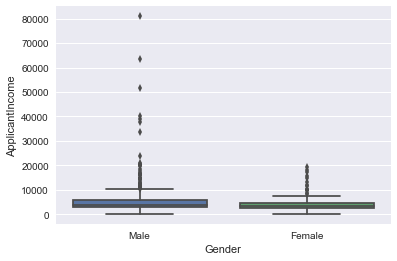

In [71]:
sns.boxplot(x = 'Gender', y = 'ApplicantIncome', data = df)

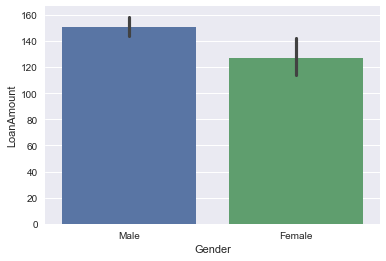

In [55]:
sns.barplot(x = 'Gender', y = 'LoanAmount', data = df)

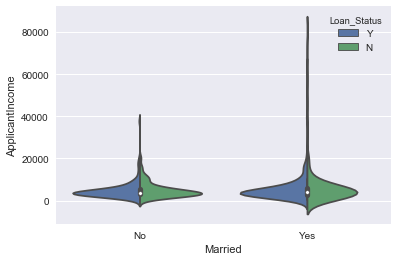

In [56]:
sns.violinplot(x = 'Married', y = 'ApplicantIncome', hue = 'Loan_Status', data = df, split = True)

## Step 3 - Modeling  

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories

In [57]:
df.Gender.value_counts()
gender_cat = pd.get_dummies(df.Gender,prefix='gender').gender_Female

df.Married.value_counts()
married_category = pd.get_dummies(df.Married,prefix='marriage').marriage_Yes

df.Education.value_counts()
graduate_category = pd.get_dummies(df.Education,prefix='education').education_Graduate

df.Self_Employed.value_counts()
self_emp_category = pd.get_dummies(df.Self_Employed,prefix='employed').employed_Yes

loan_status = pd.get_dummies(df.Loan_Status,prefix='status').status_Y

property_category = pd.get_dummies(df.Property_Area,prefix='property')

In [58]:
df.shape

(614, 13)

In [59]:
dfNew = pd.concat([df,gender_cat,married_category,graduate_category,self_emp_category,loan_status,property_category],axis=1)

In [60]:
dfNew.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,...,Credit_History,Property_Area,gender_Female,marriage_Yes,education_Graduate,employed_Yes,status_Y,property_Rural,property_Semiurban,property_Urban
0,LP001002,Y,Male,No,Graduate,No,5849,0,0,146.412162,...,1,Urban,0,0,1,0,1,0,0,1
1,LP001003,N,Male,Yes,Graduate,No,4583,1508,1,128.000000,...,1,Rural,0,1,1,0,0,1,0,0
2,LP001005,Y,Male,Yes,Graduate,Yes,3000,0,0,66.000000,...,1,Urban,0,1,1,1,1,0,0,1
3,LP001006,Y,Male,Yes,Not Graduate,No,2583,2358,0,120.000000,...,1,Urban,0,1,0,0,1,0,0,1
4,LP001008,Y,Male,No,Graduate,No,6000,0,0,141.000000,...,1,Urban,0,0,1,0,1,0,0,1


In [61]:
feature_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','gender_Female','marriage_Yes','education_Graduate','employed_Yes','property_Rural','property_Semiurban','property_Urban']

In [62]:
X = dfNew[feature_columns]

In [63]:
y =  dfNew['status_Y']

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
X_train.shape

(491, 12)

In [66]:
X_test.shape

(123, 12)

In [68]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision = decision.fit(X_train, y_train)
y_pred = decision.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, y_pred) * 100
result

70.73170731707317